In [22]:
import time
import pandas as pd
from dotenv import load_dotenv
import requests
load_dotenv()
import os
import gmaps
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
clean_rstate = pd.read_csv("outputs/raw_data_with_geocoding.csv")

A pesar de haber elegido las columnas con un mayor número de datos, todavía encontramos algunas celdas vacías. En concreto, eliminamos aquellas filas con valores nulos en la columna "floor" y "sq_mt_built puesto que las consideramos como las columnas más claves cuyos valores deben ajustarse lo máximo posible a la realidad

In [274]:
clean_rstate.dropna(subset=["floor","sq_mt_built"],inplace=True)

Para la columna 'bathrooms' completamos utilizando el valor medio de la columna

In [275]:
clean_rstate['n_bathrooms'] = clean_rstate['n_bathrooms'].fillna(int(clean_rstate['n_bathrooms'].mean()))

Finalmente, para las columnas "is_new_development", "has_lift" y "is_exterior" consideramos como False los elementos faltantes.

In [276]:
clean_rstate.fillna(False,inplace=True)

Comprobamos que ya no existen elementos nulos en el dataframe


In [277]:
clean_rstate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14791 entries, 0 to 21738
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14791 non-null  int64  
 1   sq_mt_built         14791 non-null  float64
 2   n_rooms             14791 non-null  int64  
 3   n_bathrooms         14791 non-null  float64
 4   floor               14791 non-null  object 
 5   buy_price           14791 non-null  int64  
 6   buy_price_by_area   14791 non-null  int64  
 7   is_renewal_needed   14791 non-null  bool   
 8   is_new_development  14791 non-null  bool   
 9   has_lift            14791 non-null  bool   
 10  is_exterior         14791 non-null  bool   
 11  has_parking         14791 non-null  bool   
 12  coordinates         14791 non-null  object 
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 1.1+ MB


Por otra parte, la columna "floor" contiene algunos pisos en formato string. Modificamos estos elementos para convertirnos en un integer.

In [278]:
clean_rstate.replace({'floor': {"Bajo": 0,
                                "Semi-sótano":0,
                                "Entreplanta exterior":0,
                                "Entreplanta interior":0,
                                "Entreplanta":0,
                                "Semi-sótano exterior":0,
                                "Sótano interior":0,
                                "Sótano exterior":0,
                                "Sótano":0,
                                "Semi-sótano interior":0
                                
                                }},inplace=True)

In [279]:
clean_rstate['floor'] = pd.to_numeric(clean_rstate['floor'])

Convertimos las columnas "is_renewal_needed", "is_new_development", "has_lift, is_exterior" y "has_parking" de booleano a integer.

In [280]:
def bool2int(columns): 
    for col in columns:
        clean_rstate[col] = clean_rstate[col].astype(int)

In [281]:
columns = ["is_renewal_needed", "is_new_development", "has_lift", "is_exterior","has_parking"]
bool2int(columns)

Finalmente pasamos las coordenadas geográficas a dos columnas y eliminamos la columna original "coordenadas.

In [283]:
def convert_str_to_dict(x):
    try:
        return dict(x)
    except:
        return None

clean_rstate["coordinates"] = clean_rstate["coordinates"].apply(convert_str_to_dict)
clean_rstate["lat"]= clean_rstate["coordinates"].apply(lambda x: x.get("lat")if x is not None else None)
clean_rstate["long"] = clean_rstate["coordinates"].apply(lambda x: x.get("lng") if x is not None else None)
clean_rstate.drop(["coordinates"], axis = 1, inplace = True)
clean_rstate.dropna(subset=["lat","long"],inplace=True)

In [88]:
clean_rstate = pd.read_csv("outputs/clean_data_with_geocoding.csv")

In [89]:
clean_rstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14787 non-null  int64  
 1   id                  14787 non-null  int64  
 2   sq_mt_built         14787 non-null  float64
 3   n_rooms             14787 non-null  int64  
 4   n_bathrooms         14787 non-null  float64
 5   floor               14787 non-null  int64  
 6   buy_price           14787 non-null  int64  
 7   buy_price_by_area   14787 non-null  int64  
 8   is_renewal_needed   14787 non-null  int64  
 9   is_new_development  14787 non-null  int64  
 10  has_lift            14787 non-null  int64  
 11  is_exterior         14787 non-null  int64  
 12  has_parking         14787 non-null  int64  
 13  lat                 14787 non-null  float64
 14  long                14787 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 1.7 MB


Mostramos los datos sobre mapa para confirmar que los datos geográficos son correctos

In [70]:
from folium import Map, Marker, Icon, FeatureGroup, LayerControl, Choropleth

In [71]:
m = Map(location=[40.392521, -3.698083],zoom_start=5)
for i, row in a.iterrows():
    house = {
        "location":[row["lat"], row["long"]]
    }
    Marker(**house).add_to(m)

Detectamos 4 valores cuya localización es incorrecta, por lo que los eliminamos

In [90]:
clean_rstate[(clean_rstate["lat"]<40)|(a["lat"]>41)]

,Unnamed: 0,id,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,has_lift,is_exterior,has_parking,lat,long
232,289,21453,92.0,3,2.0,4,175000,1902,0,0,1,1,0,34.052234,-118.243685
371,456,21286,66.0,2,1.0,0,95000,1439,1,0,0,1,0,36.928047,-4.191700
6322,9075,12667,121.0,3,2.0,5,440000,3636,0,0,1,1,0,43.489646,-8.219345
6662,9765,11977,65.0,1,1.0,0,189000,2908,0,0,0,1,0,2.444814,-76.614739


In [93]:
ids = [21453, 21286,12667,11977]

for i in ids:
    clean_rstate.drop(clean_rstate[clean_rstate['id'] == i].index, inplace = True) 


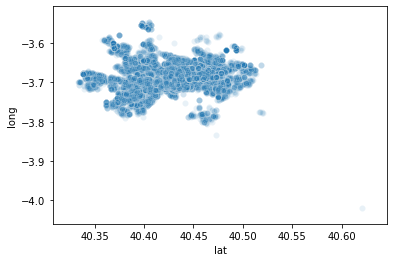

In [97]:
sns.scatterplot(x="lat",y="long",data=clean_rstate, alpha=0.1 )

Para finalizar, mostramos la matriz de correlación para comprobar que la correlación entre las columnas es baja.
Observamos que las columnas con mayor correlación son:
- Metros cuadrados con el número de habitaciones, baños y precio.
- Precio de venta del piso con el precio del area.

Ambas correlaciones se corresponden tal y como esperábamos puesto que se trata de los aspectos más relevantes en la definición del precio de venta de la vivienda.


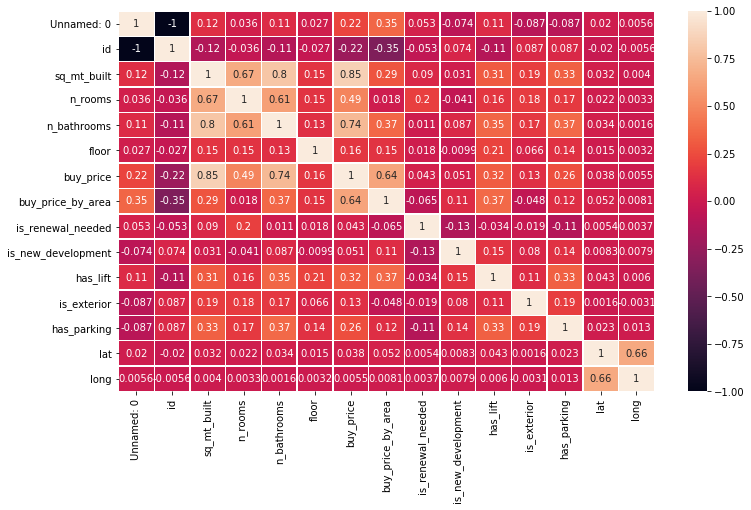

In [10]:
corr_matrix = a.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5)

Exportamos los datos en formato csv

In [95]:
clean_rstate.to_csv("outputs/clean_data_with_geocoding.csv")